## Let's bring sample school data into Jupyter using Python

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv(r'C:\NWEA_Conference\SampleSchoolData.csv')
data.iloc[np.r_[0:5, -5:0]]

,School,Name,Grade,Course,TestPercentile,GrowthPercentile
0,Scranton Elementary,Michael,1,Reading,17,96
1,Scranton Elementary,Pam,2,Reading,25,12
2,Scranton Elementary,Jim,3,Reading,8,50
3,Scranton Elementary,Dwight,1,Reading,24,57
4,Scranton Elementary,Oscar,2,Reading,79,32
45,Nashua Elementary,Fred,2,Math,40,2
46,Nashua Elementary,Sarah,3,Math,51,91
47,Nashua Elementary,Simon,1,Math,94,14
48,Nashua Elementary,Latisha,2,Math,53,70
49,Nashua Elementary,Michael,3,Math,67,42


## Let's look at some basic info about the data

In [56]:
print('N of Rows and Columns', data.shape)
print('Schools in File', data.School.unique())
print('Courses in File', data.Course.unique())

N of Rows and Columns (50, 6)
Schools in File ['Scranton Elementary' 'Corporate Elementary' 'Nashua Elementary']
Courses in File ['Reading' 'Math']


## Let's look at only reading data

In [57]:
reading_data = data[data['Course'] == 'Reading']

print('Courses in File', data.Course.unique())

Courses in File ['Reading' 'Math']


## What is the median test percentile for each grade in Reading?

In [58]:
grouped_grade = reading_data.groupby(['Grade'])['TestPercentile'].median()
grouped_grade

Grade
1    24.0
2    53.5
3    65.5
Name: TestPercentile, dtype: float64

## What is the median test percentile for each school in Reading?

In [59]:
grouped_school = reading_data.groupby(['School'])['TestPercentile'].median()
grouped_school

School
Corporate Elementary    38.5
Nashua Elementary       69.0
Scranton Elementary     21.0
Name: TestPercentile, dtype: float64

## Create a graph showing the results

<AxesSubplot:xlabel='School'>

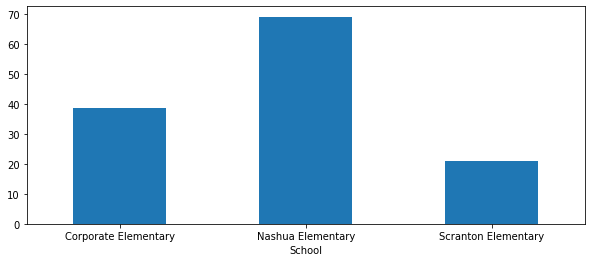

In [60]:
grouped_school.plot(kind='bar', rot=0, figsize=(10,4))

## What are the median test and growth percentiles of each grade level at each campus? 

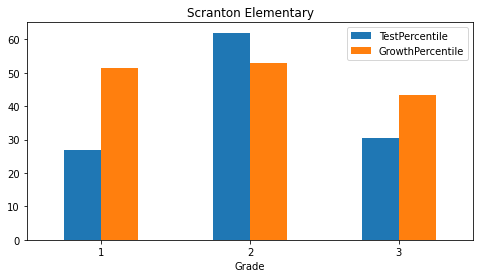

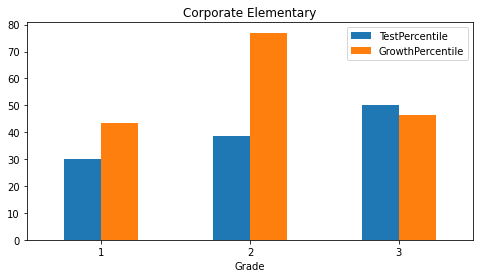

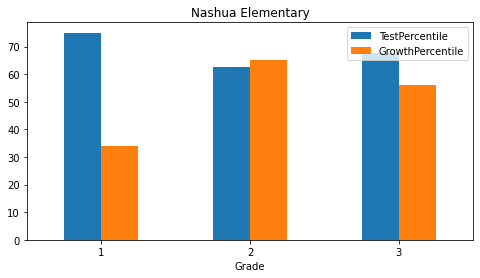

In [62]:
for school_name in list(data.School.unique()):
    school_data = data[data['School'] == school_name]
    grouped_school = school_data.groupby(['Grade'])[['TestPercentile', 'GrowthPercentile']].median()
    grouped_school.plot(kind='bar', rot=0, figsize=(8,4), title=school_name)
    plt.savefig(r'C:\NWEA_Conference\SchoolImages\{}.jpg'.format(school_name))